In [ ]:
# Você foi contratado pela empresa S&M Analytics Finance para analisar a forma de pagamento realizadas pelos clientes em 
# um e-Comerce. Sua tarefa é criar um algoritmo SVM para classificar se a compra foi paga por Pix (forma de pagamento: 1)
#  ou cartão de crédito (forma de pagamento: 0).

# Criar índice do 0 a 199
#'cliente': criar código, de forma randômica, ID do 1 ao 200
#'valor_compra': criar valores, de forma randômica, de R$ 10,00 a R$ 500,00
#'qtde_produtos': criar quantidade, de forma randômica, de 1 a 20
#'forma_pagamento': criar forma de pagamento, de forma randômica, 0 ou 1.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Gerar dados anônimos
np.random.seed(42)  # para reprodutibilidade

dados = pd.DataFrame({
    'cliente': np.random.choice(range(1, 201), size=200, replace=False),
    'valor_compra': np.round(np.random.uniform(10, 500, size=200), 2),
    'qtde_produtos': np.random.randint(1, 21, size=200),
    'forma_pagamento': np.random.choice([0, 1], size=200)  # 0 = cartão, 1 = pix
}, index=range(200))  # índice de 0 a 199

# Separar variáveis independentes e dependente
X = dados[['valor_compra', 'qtde_produtos']].values
y = dados['forma_pagamento'].values

# Dividir em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=3)

# Padronizar os dados
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.transform(X_teste)

# Treinar modelo SVM
modelo = SVC(kernel='linear', random_state=3)
modelo.fit(X_treino, y_treino)

# Previsão
y_pred = modelo.predict(X_teste)


In [8]:
print("Previsões do modelo:", y_pred)

Previsões do modelo: [1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1
 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1]


In [9]:
from sklearn.metrics import accuracy_score
print("Acurácia:", accuracy_score(y_teste, y_pred))

Acurácia: 0.48333333333333334


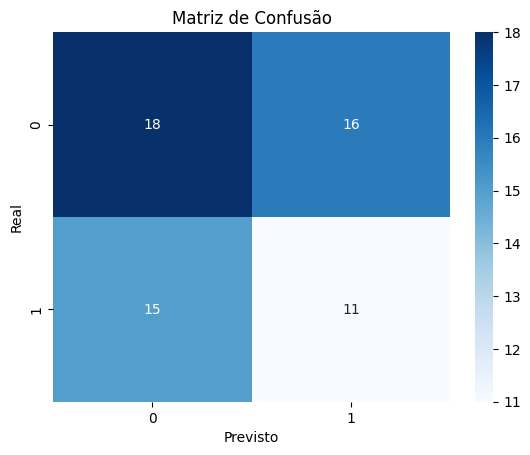

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

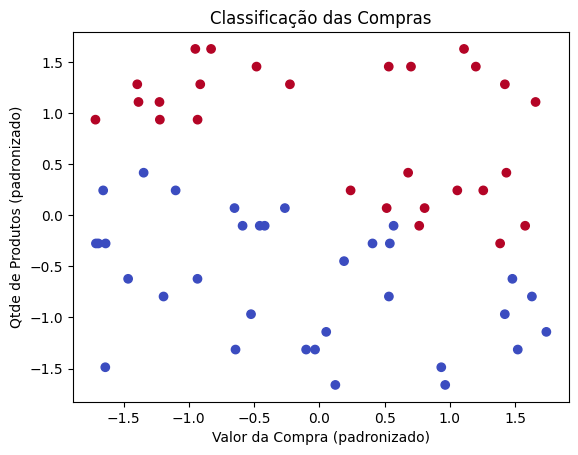

In [11]:
plt.scatter(X_teste[:, 0], X_teste[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Classificação das Compras")
plt.xlabel("Valor da Compra (padronizado)")
plt.ylabel("Qtde de Produtos (padronizado)")
plt.show()